In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
path='D:\\Program\\House Price India.csv'
df=pd.read_csv(path)
print(df.head())
print(df.info())

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                

In [11]:
df_model=df[['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'grade of the house', 'Price']].copy()
df_model.dropna(inplace=True)
df_model.rename(columns={
    'number of bedrooms': 'bedrooms',
    'number of bathrooms': 'bathrooms',
    'living area': 'living_area',
    'lot area': 'lot_area',
    'grade of the house': 'grade',
    'Price': 'price'
}, inplace=True)
print(df_model.head())
print("\nSummary:")
print(df_model.info())

   bedrooms  bathrooms  living_area  lot_area  grade    price
0         4       2.50         2920      4000      8  1400000
1         5       2.75         2910      9480      8  1200000
2         4       2.50         3310     42998      9   838000
3         3       2.00         2710      4500      8   805000
4         3       2.50         2600      4750      9   790000

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14619 non-null  int64  
 1   bathrooms    14619 non-null  float64
 2   living_area  14619 non-null  int64  
 3   lot_area     14619 non-null  int64  
 4   grade        14619 non-null  int64  
 5   price        14619 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 685.4 KB
None


In [12]:
x=df_model[['bedrooms','bathrooms','living_area','lot_area','grade']]
y=df_model['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
print("Sample Prediction:",y_pred[:5])

Mean Squared Error: 62358053969.4019
Sample Prediction: [560480.41891571 464718.02988458 437678.01000402 527536.4914534
 765936.30952717]


In [18]:
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 249715.94656609718


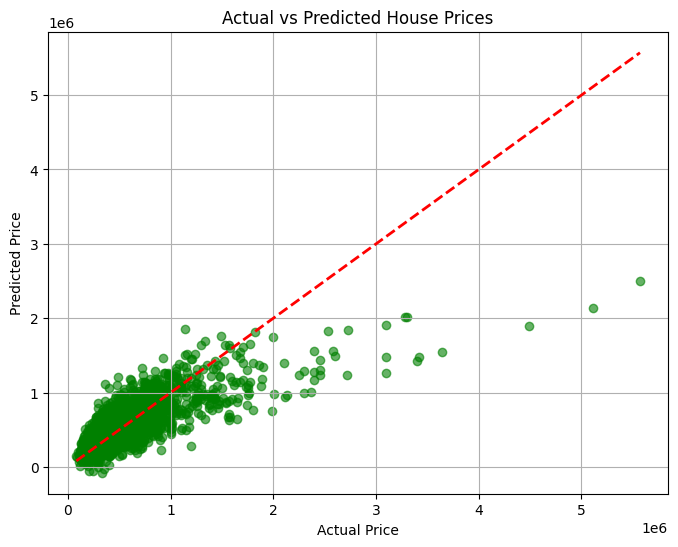

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()